In [135]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [136]:
data = pd.read_csv('/home/lamontano/Capstone2_PsycheNasaProject/Capstone2/Data/SPT100_TeamIonData.csv')  # load data set
#Drop index column
data.set_index('Voltage (V)', inplace=True)
#data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
X = np.array(data.iloc[:, 1:11].values)
label = LabelEncoder()
data['Thrust'] = label.fit_transform(data['Thrust'])
#from sklearn.model_selection import train_test_split
#Y = np.array(data.iloc[:, 1:11].values)
print(Y)
print(X.shape, Y.shape)
print(data.head)



[[9.03e+02 3.45e+00 2.60e-01 3.71e+00 7.10e-02 4.43e+01 1.22e+03 2.93e-01
  1.40e-03]
 [9.75e+02 3.87e+00 2.60e-01 4.13e+00 6.40e-02 5.88e+01 1.45e+03 4.30e-01
  1.50e-03]
 [1.05e+03 4.17e+00 2.60e-01 4.43e+00 6.00e-02 6.41e+01 1.48e+03 4.41e-01
  1.50e-03]
 [1.12e+03 4.42e+00 2.60e-01 4.68e+00 5.70e-02 6.86e+01 1.49e+03 4.48e-01
  1.60e-03]
 [1.19e+03 4.66e+00 2.70e-01 4.93e+00 5.50e-02 7.28e+01 1.51e+03 4.53e-01
  1.60e-03]
 [1.27e+03 4.93e+00 2.60e-01 5.19e+00 5.00e-02 7.82e+01 1.54e+03 4.64e-01
  1.70e-03]
 [1.35e+03 5.18e+00 2.60e-01 5.44e+00 4.70e-02 8.27e+01 1.55e+03 4.67e-01
  1.80e-03]
 [1.42e+03 5.42e+00 2.60e-01 5.68e+00 4.70e-02 8.66e+01 1.55e+03 4.64e-01
  1.80e-03]
 [1.49e+03 5.64e+00 2.60e-01 5.91e+00 4.50e-02 9.17e+01 1.58e+03 4.78e-01
  1.90e-03]
 [1.28e+03 4.96e+00 2.60e-01 5.22e+00 5.10e-02 7.78e+01 1.52e+03 4.52e-01
  1.70e-03]
 [9.04e+02 3.55e+00 5.00e-01 4.05e+00 1.20e-01 5.45e+01 1.37e+03 4.05e-01
  1.40e-03]
 [9.73e+02 3.80e+00 5.00e-01 4.30e+00 1.20e-01 5.96e+0

In [137]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Current (A),66.0,3.991061,0.629645,2.9800,3.49000,4.0050,4.50000,5.0200
Power (W),66.0,1025.166667,232.190743,598.0000,858.25000,1010.0000,1190.00000,1500.0000
Anode Flow (mg/s),66.0,4.568788,0.638097,3.3500,4.08750,4.6400,5.08750,5.6400
Cathode Flow (mg/s),66.0,0.470455,0.251399,0.2600,0.26000,0.5000,0.50000,1.0000
Cathode,66.0,5.045606,0.658827,3.7100,4.57500,5.1900,5.56250,6.4800
Cathode Fraction,66.0,0.094227,0.049086,0.0450,0.05550,0.0860,0.11000,0.2400
Thrust,66.0,30.969697,18.071626,0.0000,16.25000,30.5000,45.75000,62.0000
Specific impulse (s),66.0,1321.818182,150.669369,1050.0000,1200.00000,1330.0000,1450.00000,1590.0000
Efficiency,66.0,0.415485,0.043896,0.2930,0.39225,0.4140,0.45275,0.4960
Facility Pressure (Pa),66.0,0.001748,0.000202,0.0014,0.00160,0.0018,0.00190,0.0022


In [138]:
data.shape

(66, 10)

In [139]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,  test_size = 0.33)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(44, 9) (44, 9)
(22, 9) (22, 9)


In [140]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

LR = LinearRegression()
model = LR.fit(X_train, Y_train)
y_predictions = LR.predict(X_test)

In [141]:
print(model.score(X_test,Y_test))

0.9894670330767373


/home/lamontano/.local/lib/python3.5/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [142]:
print(X_test.shape, Y_test.shape)

(22, 9) (22, 9)


In [143]:
print(X_test.shape, y_predictions.shape)

(22, 9) (22, 9)


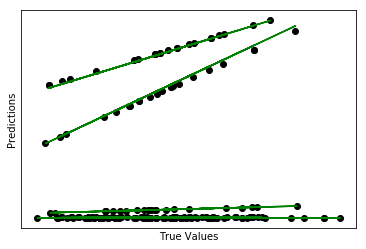

In [144]:
# Plot Linear Regression
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_predictions, color='green')

plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()